<a href="https://www.kaggle.com/madhuri15/heart-failure-prediction-eda?scriptVersionId=88446834" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing Libraries & Data

In [1]:
# Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

colors = ['#9A9483', '#99A799', '#D3E4CD', '#26191B']
sns.set_palette(colors)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=[14, 8]
plt.rc("axes",
       labelsize=14.5,
       labelweight='regular',
       labelcolor='#000000',
       labelpad = 13,
       titlesize=18,
       titleweight=550,
       titlecolor="#000000",
       fc='#EADEB8',
       titlepad=10,)

plt.rc("xtick",
      labelsize=14,
      labelcolor='#000000')

plt.rc("ytick",
      labelsize=14,
      labelcolor='#000000',)

plt.rc("grid", ls = "--", linewidth=1, c="#888888")

plt.rc("legend",
       shadow=False,
       fancybox=True,
       edgecolor='#000000',
       handlelength=0.8,
       fontsize=12,
       fc="#ffffff")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
# data loading
data = pd.read_csv("../input/heart-failure-prediction/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Features Description
* **Age** : age of the patient [years]
* **Sex** : sex of the patient [M: Male, F: Female]
* **ChestPainType** : chest pain type

    - TA: Typical Angina, 
    - ATA: Atypical Angina, 
    - NAP: Non-Anginal Pain, 
    - ASY: Asymptomatic
    
* **RestingBP** : resting blood pressure [mm Hg]
* **Cholesterol**: serum cholesterol [mm/dl]
* **FastingBS** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* **RestingECG** : resting electrocardiogram results 
     - Normal: Normal, 
     - ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
     - LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
     
* **MaxHR** : maximum heart rate achieved [Numeric value between 60 and 202]
* **ExerciseAngina** : exercise-induced angina [Y: Yes, N: No]
* **Oldpeak** : oldpeak = ST [Numeric value measured in depression]
* **ST_Slope** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* **HeartDisease** : output class [1: heart disease, 0: Normal]

In [3]:
print("Shape: ", data.shape)

Shape:  (918, 12)


### Summary

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


 ### Description

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Missing Data

In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no null values in data.

## Data Analysis
## Age:

Patient's of Age from 28 to 77 included in the dataset. The distribution of age is left skewed so that, the mean of age is slightly less than the median. There is no such a difference observed in the distribution of Age with or without Heart Disease. So, we can say that, Age may not be major factor to diagnose the Heart Failure.

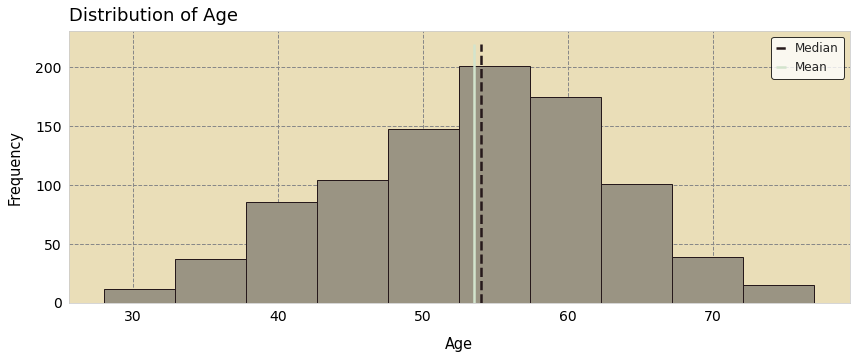

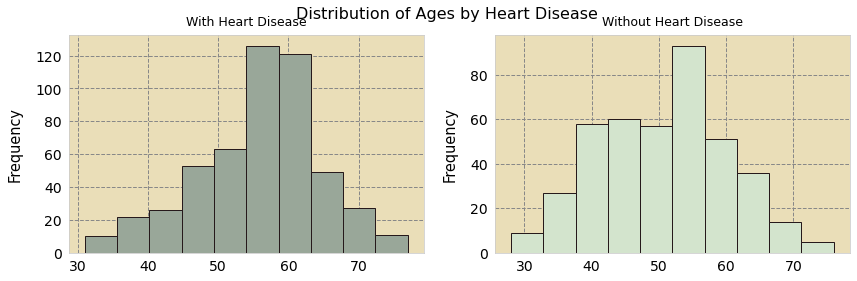

In [7]:
# data preparation for distribution of ages.
ageMed=data.Age.median()
ageMean = data.Age.mean()

# grouped data by target feature 'HeartDisease'
group = data.groupby(by='HeartDisease')
hd_df = group.get_group(1)
nhd_df = group.get_group(0)

# selecting age by heart disease
a = hd_df['Age']
b = nhd_df['Age']

# plot
plt.figure(figsize=(14, 5))
plt.hist(data.Age,  ec=colors[-1])
plt.vlines(ageMed, ymin=0, ymax=220, color=colors[-1], ls='--', lw=2.5, label='Median')
plt.vlines(ageMean, ymin=0, ymax=220, color=colors[-2], lw=2.5, label='Mean')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Age", loc='left')
plt.legend()

# subplots
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
ax1 = a.plot(kind='hist', ax=axs[0], ec=colors[-1], color=colors[1])
ax1.set_title('With Heart Disease', size=12.5)
ax2 = b.plot(kind='hist', ax=axs[1], ec=colors[-1], color=colors[2])
ax2.set_title('Without Heart Disease', size=12.5)

fig.suptitle('Distribution of Ages by Heart Disease', size=16, c='#000')
plt.show()

## Resting Blood Pressure

The Distribution of Resting Blood Pressure is right skewed, this shows that the some of the patients having higher blood pressure values. While comparing the distribution of BP with and without Heart Disease, we can see that the patient with heart disease have higher blood pressure.

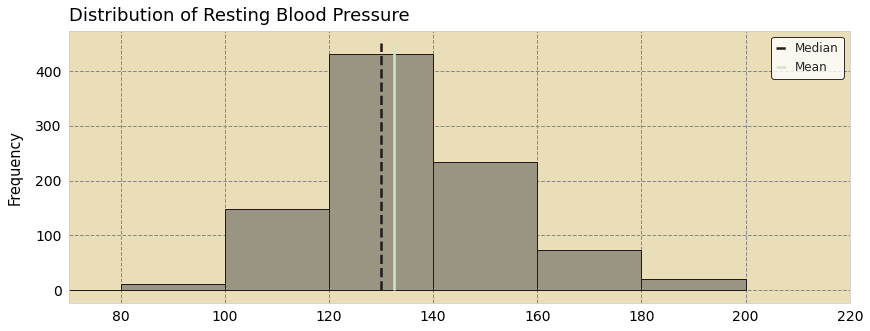

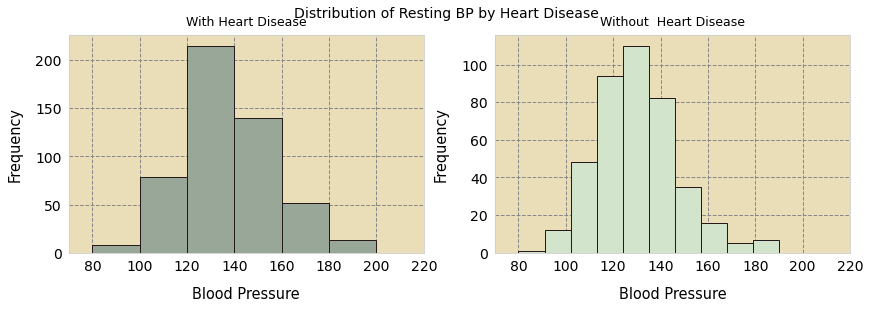

In [8]:
# data preparation for distribution of RestingBP.
bpMed = data.RestingBP.median()
bpMean = data.RestingBP.mean()

# grouped data by target feature 'HeartDisease'
a = hd_df['RestingBP'] # with HeartDisease
b = nhd_df['RestingBP'] # without HeartDisease

# plot
plt.figure(figsize=(14, 5))
plt.hist(data.RestingBP,  ec=colors[-1])
plt.vlines(bpMed, ymin=-0.1, ymax=450, color=colors[-1], ls='--', lw=2.5, label='Median')
plt.vlines(bpMean, ymin=0, ymax=450, color=colors[-2],lw=2.5, label='Mean')

plt.xlim(70, 220)
plt.ylabel('Frequency')
plt.title("Distribution of Resting Blood Pressure", loc='left')
plt.legend()

# subplots
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
ax1 = a.plot(kind='hist', ax=axs[0],  ec=colors[-1], color=colors[1])
ax1.set_title('With Heart Disease', size=12.5)
ax1.set_xlabel('Blood Pressure')
ax1.set_xlim(70, 220)

ax2 = b.plot(kind='hist', ax=axs[1],  ec=colors[-1], color=colors[2])
ax2.set_title('Without  Heart Disease', size=12.5)
ax2.set_xlabel('Blood Pressure')
ax2.set_xlim(70, 220)

fig.suptitle('Distribution of Resting BP by Heart Disease', size=14, c='#000')
plt.show()

## Serum Cholesterol[mm/dl]

The distribution of serum cholesterol is right skewed, which shows that the some of the patients with high cholesterol values. The comparison shows that patient's with Heart Disease have higher cholesterol as compare to the patient without Heart Disease.

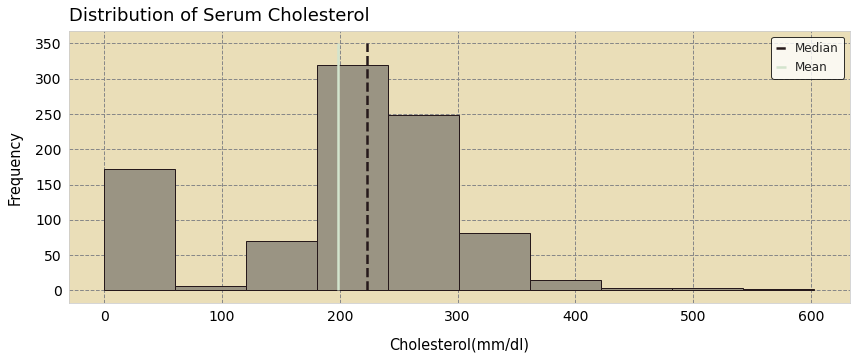

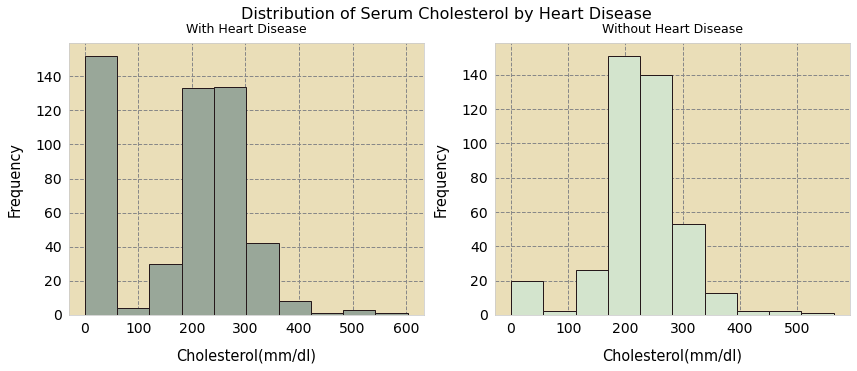

In [9]:
# data preparation for distribution of serum cholesterol [mm/dl].
CholesterolMed=data.Cholesterol.median()
CholesterolMean = data.Cholesterol.mean()

# grouped data by target feature 'HeartDisease'
a = hd_df['Cholesterol']
b = nhd_df['Cholesterol']

# plot
plt.figure(figsize=(14, 5))
plt.hist(data.Cholesterol, ec=colors[-1], color='#9A9483')
plt.vlines(CholesterolMed, ymin=-0.1, ymax=350, color=colors[-1], ls='--', lw=2.5, label='Median')
plt.vlines(CholesterolMean, ymin=0, ymax=350, color=colors[-2],lw=2.5, label='Mean')


plt.xlabel('Cholesterol(mm/dl)')
plt.ylabel('Frequency')
plt.title("Distribution of Serum Cholesterol", loc='left')
plt.legend()

# subplots
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1 = a.plot(kind='hist', ax=axs[0], ec=colors[-1], color=colors[1])
ax1.set_title('With Heart Disease', size=12.5)
ax1.set_xlabel('Cholesterol(mm/dl)')

ax2 = b.plot(kind='hist', ax=axs[1], ec=colors[-1], color=colors[2])
ax2.set_title('Without Heart Disease', size=12.5)
ax2.set_xlabel('Cholesterol(mm/dl)')

fig.suptitle('Distribution of Serum Cholesterol by Heart Disease', size=16, c='#000')
plt.show()

## FastingBS

The bar plot shows that, the most of the patients have had fasting blood sugar less than 120 mg/dl. Most of patients with high blood sugar have heart disease. However, there is no such difference between the number of patients with fasting blood sugar less than 120.

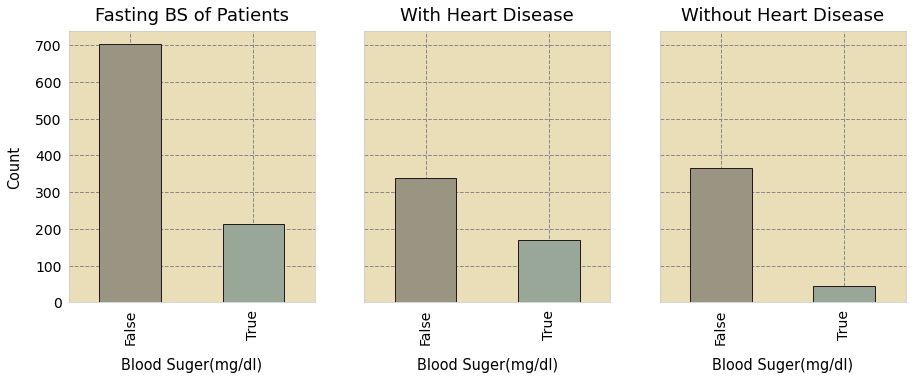

In [10]:
# grouped data by target feature 'HeartDisease'
a = hd_df['FastingBS'].value_counts()
a.rename(index={0:'False', 1:'True'}, inplace=True)
b = nhd_df['FastingBS'].value_counts()
b.rename(index={0:'False', 1:'True'}, inplace=True)

df = data.groupby(by=['FastingBS']).count()['HeartDisease']
df.rename(index={0:'False', 1:'True'}, inplace=True)

# plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
ax1 = df.plot(kind='bar', ax=axs[0], color=colors[0:2], ec=colors[-1])
ax1.set_xlabel('Blood Suger(mg/dl)')
ax1.set_ylabel('Count')
ax1.set_title("Fasting BS of Patients")

ax2 = a.plot(kind='bar', ax=axs[1], color=colors[0:2], ec=colors[-1])
ax2.set_xlabel('Blood Suger(mg/dl)')
ax2.set_title("With Heart Disease")

ax3 = b.plot(kind='bar', ax=axs[2], color=colors[0:2], ec=colors[-1])
ax3.set_xlabel('Blood Suger(mg/dl)')
ax3.set_title("Without Heart Disease")
plt.show()

## MaxHR (Maximum Heart Rate)
The distribution of maximum heart rate is left skewed, which shows that, some of the patients have comparatively low heart rate. The maximum heart rate of patients without heart disease shows a higher heart rate (around 160) as compare to maximum heart rate of patients with heart disease(~120). The histogram of people without heart disease shows the leptokurtic ditribution.

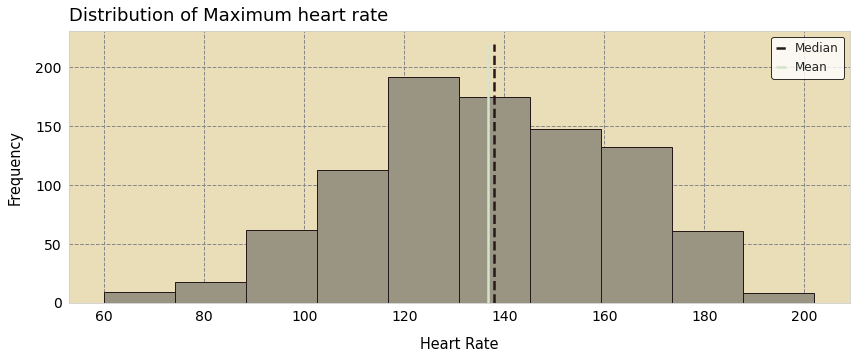

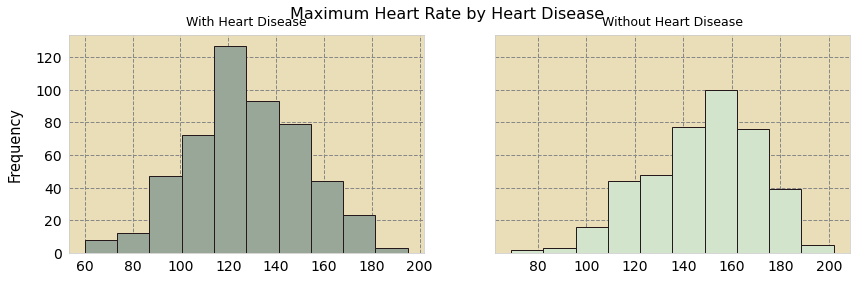

In [11]:
# data preparation for distribution of maximum heart rate.
hrMed=data.MaxHR.median()
hrMean = data.MaxHR.mean()

# grouped data by target feature 'HeartDisease'
a = hd_df['MaxHR']
b = nhd_df['MaxHR']

# plot
plt.figure(figsize=(14, 5))
plt.hist(data.MaxHR, ec=colors[-1])
plt.vlines(hrMed, ymin=0, ymax=220, color=colors[-1], ls='--', lw=2.5, label='Median')
plt.vlines(hrMean, ymin=0, ymax=220, color=colors[-2], lw=2.5, label='Mean')

plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title("Distribution of Maximum heart rate", loc='left')
plt.legend()

# subplots
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(14, 4), sharey=True)
ax1 = a.plot(kind='hist', ax=axs[0], color=colors[1], ec=colors[-1])
ax1.set_title('With Heart Disease', size=12.5)
ax2 = b.plot(kind='hist', ax=axs[1], color=colors[2], ec=colors[-1])
ax2.set_title('Without Heart Disease', size=12.5)

fig.suptitle('Maximum Heart Rate by Heart Disease', size=16, c='#000')
plt.show()

## ST Depression by exercise relative to rest((Oldpeak)
The histogram shows that, the data is highly right skewed. Histograms for target features shows that, the ST Depression for people without heart disease is 0, where as the ST Depression values for the people with heart disease is between -0.1 to 4.

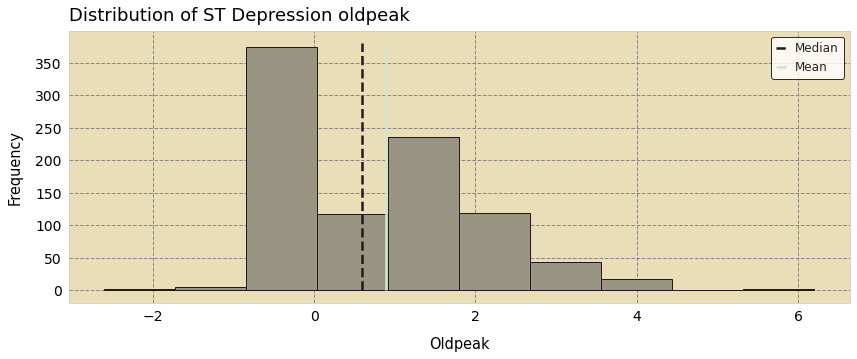

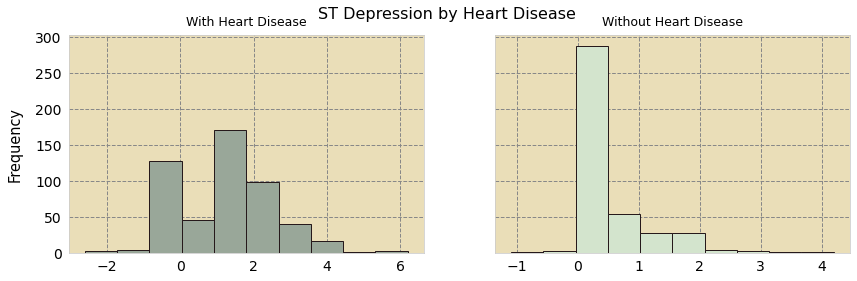

In [12]:
# data preparation for distribution of oldpeak
OldpeakMed=data.Oldpeak.median()
OldpeakMean = data.Oldpeak.mean()

# grouped data by target feature 'HeartDisease'
a = hd_df['Oldpeak']
b = nhd_df['Oldpeak']

# plot
plt.figure(figsize=(14, 5))
plt.hist(data.Oldpeak, ec=colors[-1])
plt.vlines(OldpeakMed, ymin=-0.1, ymax=380, color=colors[-1], ls='--', lw=2.5, label='Median')
plt.vlines(OldpeakMean, ymin=0, ymax=380, color=colors[-2], lw=2.5, label='Mean')

plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.title("Distribution of ST Depression oldpeak", loc='left')
plt.legend()

# subplots
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(14, 4), sharey=True)
ax1 = a.plot(kind='hist', ax=axs[0], color=colors[1], ec=colors[-1])
ax1.set_title('With Heart Disease', size=12.5)
ax2 = b.plot(kind='hist', ax=axs[1], color=colors[2], ec=colors[-1])
ax2.set_title('Without Heart Disease', size=12.5)

fig.suptitle('ST Depression by Heart Disease', size=16, c='#000')
plt.show()

## Gender Classification of People with Heart Disease
90% of people with heart disease are male, which shows that men are more likely to have a heart disease than women.


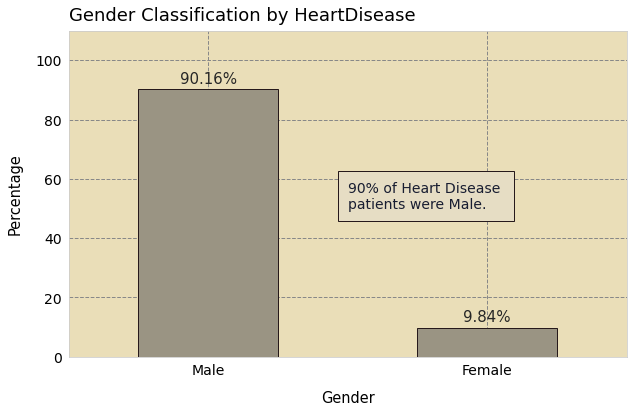

In [13]:
# Grouping data based on sex values on Data of people with HeartDisease.
a = hd_df.groupby('Sex').count()['Age'].sort_values(ascending=False)
a = (a/a.sum())*100
a.rename(index={'M':'Male', 'F':'Female'}, inplace=True)

a.plot(kind='bar', ec=colors[-1], figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender Classification by HeartDisease', loc='left')

# annotation
i = 0
for val in a.values:
    plt.text(i, val+2, str(round(val, 2))+'%', size=15, ha='center')
    i += 1

plt.text(0.5, 50, '90% of Heart Disease \npatients were Male. ', fontsize=14, color='#181D31',
        bbox={'pad':10,'fc':'#E6DDC4', 'ec':colors[-1]})

plt.ylim(0, 110)
plt.xticks(rotation=0)
plt.show()

## Chest pain type
Asymptomatic type of chest pain is most common in both Woman and Man having heart disease.

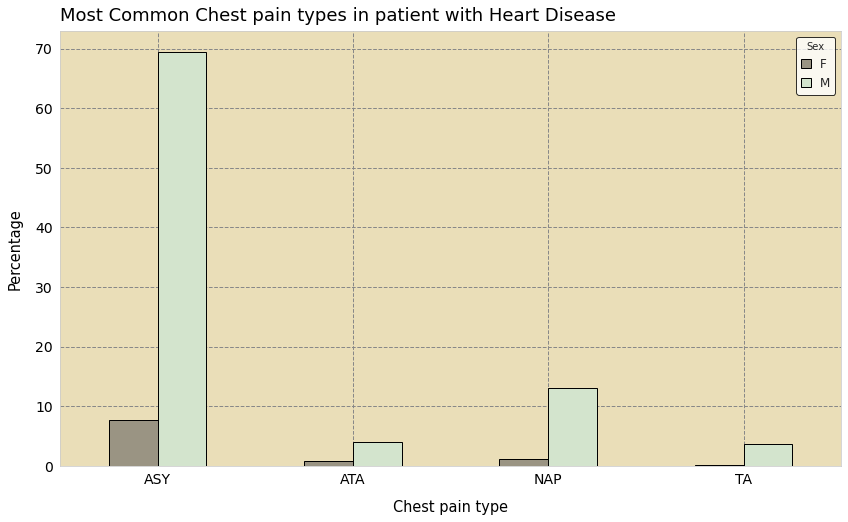

In [14]:
# Most common chest pain in patients in heart disease.
a = hd_df.groupby(['ChestPainType', 'Sex'])['HeartDisease'].count()
a = (a/a.sum())*100

# plot
a.unstack().plot(kind='bar', ec='#000', color=colors[::2])

plt.xlabel('Chest pain type')
plt.ylabel('Percentage')
plt.title("Most Common Chest pain types in patient with Heart Disease ", loc='left')

plt.xticks(rotation=0)
plt.show()

## Resting Electrocardiogram Result

Most of the patients with heart disease have Normal Resting ECG result, however bar plot shows, the result for ST and LVH resting ECG are same.

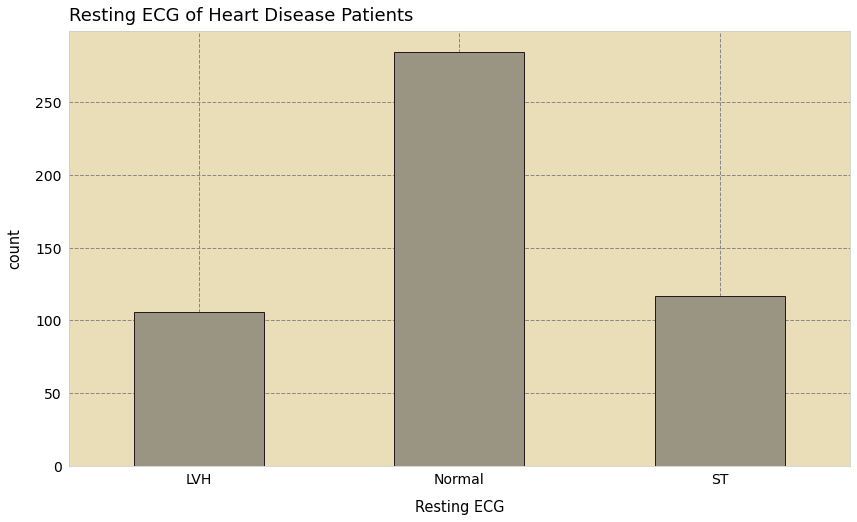

In [15]:
# Observation for Resting ECG result.
a = hd_df.groupby(by=['RestingECG']).count()['Age']

# plot
a.plot(kind='bar', ec=colors[-1])

plt.xlabel('Resting ECG')
plt.ylabel('count')
plt.title('Resting ECG of Heart Disease Patients', loc='left')

plt.xticks(rotation=0)

plt.show()

## Slope of the peak exercise ST segment

Flat and Up is the most common slope of the peak exercise ST segment for most of the patients. However, most of people with a heart disease have had flat excercise ST segment, while people without heart disease have up excercise ST segment.

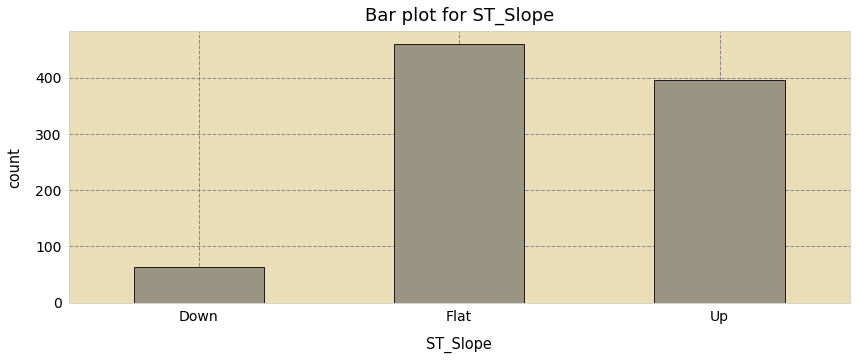

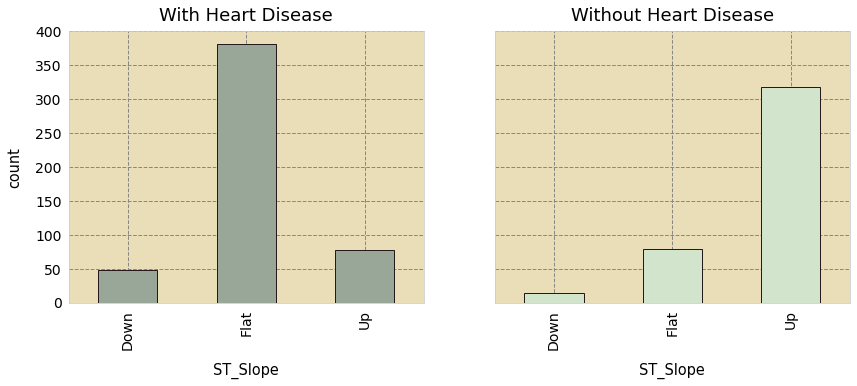

In [16]:
# bar plot for st_slope
data.groupby(by=['ST_Slope']).count()['Age'].plot(kind='bar', figsize=(14, 5), ec=colors[-1])

plt.ylabel('count')
plt.title('Bar plot for ST_Slope')
plt.xticks(rotation=0)

# plot by heart disease
fig, ax=plt.subplots(1, 2, figsize=(14, 5), sharey=True)
hd_df.groupby(by=['ST_Slope']).count()['Age'].plot(kind='bar', ax=ax[0],  ec=colors[-1], color=colors[1], title="With Heart Disease", ylabel='count')
nhd_df.groupby(by=['ST_Slope']).count()['Age'].plot(kind='bar', ax=ax[1],   ec=colors[-1], color=colors[2], title="Without Heart Disease")

plt.show()

## Exercise Induced Angina 

Around 60% of patient haven't had exercise induced angina. But comparing patients by heart disease shows that, people with heart disease are more likely to have a exercise induced angina than people without heart disease.

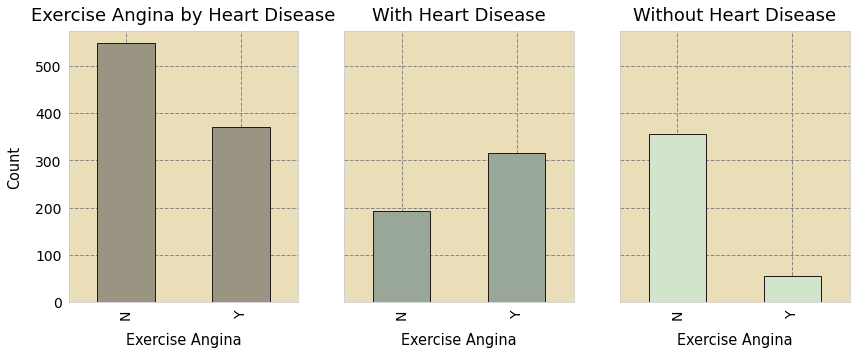

In [17]:
# Bar plot for exercise induced angina by heart disease.
# Y: Yes, N: No
fig, ax=plt.subplots(1, 3, figsize=(14, 5), sharey=True)
l = ['Count', 'Exercise Angina']
data.groupby(by=['ExerciseAngina']).count()['Age'].plot(kind='bar', ec=colors[-1], ax=ax[0], title='Exercise Angina by Heart Disease', ylabel=l[0], xlabel=l[1])
hd_df.groupby(by=['ExerciseAngina']).count()['Age'].plot(kind='bar', ax=ax[1],  ec=colors[-1], color=colors[1], title="With Heart Disease",xlabel=l[1])
nhd_df.groupby(by=['ExerciseAngina']).count()['Age'].plot(kind='bar', ax=ax[2],   ec=colors[-1], color=colors[2], title="Without Heart Disease", xlabel=l[1])

plt.show()

## Data preprocessing

Data has some categorical features, let's convert them into integers.

In [18]:
# Using replace
data['Sex'].replace({'M':1, 'F':0}, inplace=True)
data['ExerciseAngina'].replace({'Y':1, 'N':0}, inplace=True)

# using 'pd.get_dummies()'
cat_cols=data.select_dtypes('object')
cat_col_encode = pd.get_dummies(cat_cols)

# drop categorical columns
data.drop(columns=cat_cols, axis=1, inplace=True)

# combine new columns with original data
df = pd.concat([data, cat_col_encode], axis=1) 

# view first 5 rows
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


### **Normalizing the Data**



In [19]:
from sklearn.preprocessing import StandardScaler

# split data into X and Y
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

scale = StandardScaler()
scaled_df = scale.fit_transform(X)

scaled_data = pd.DataFrame(scaled_df, columns=X.columns)
scaled_X = scaled_data

## Building a Model

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from math import sqrt
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_df = pd.DataFrame(data=[], columns=['Accuracy', 'RMSE'], 
                      index=['LogisticRegression', 'AdaBoostCLF', 'GradientBoostCLF', 'RandomForestClf', 'DecisionTreeClf'])

# split data
x_train, x_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.30, random_state=42)

In [21]:
# LogisticRegression model
LR_model = LogisticRegression(random_state=42)

# fit model
LR_model.fit(x_train, y_train)

# predictions
preds = LR_model.predict(x_test)

# accuracy
mse = mean_squared_error(y_test, preds)
rmse = sqrt(mse)

acc = accuracy_score(y_test, preds)
acc_df.iloc[0] = acc, rmse

In [22]:
# AdaBoostClassifier model
AB_model = AdaBoostClassifier(learning_rate=0.25, random_state=1)

# fit model
AB_model.fit(x_train, y_train)

# predictions
preds = AB_model.predict(x_test)

# accuracy
mse = mean_squared_error(y_test, preds)
rmse = sqrt(mse)

acc = accuracy_score(y_test, preds)
acc_df.iloc[1] = acc, rmse

In [23]:
# Gradient Boosting Classifier model
GB_clf = GradientBoostingClassifier(learning_rate=0.02, random_state=453)

# fit model
GB_clf.fit(x_train, y_train)

# predictions
preds = GB_clf.predict(x_test)

# accuracy
mse = mean_squared_error(y_test, preds)
rmse = sqrt(mse)

acc = accuracy_score(y_test, preds)
acc_df.iloc[2] = acc, rmse

In [24]:
# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=453)

# fit model
RF_clf.fit(x_train, y_train)

# predictions
preds = RF_clf.predict(x_test)

# accuracy
mse = mean_squared_error(y_test, preds)
rmse = sqrt(mse)

acc = accuracy_score(y_test, preds)
acc_df.iloc[3] = acc, rmse

In [25]:
# DecisionTreeClassifier model
Dt_clf = DecisionTreeClassifier(criterion='gini',random_state=5)

# fit model
Dt_clf.fit(x_train, y_train)

# predictions
preds = Dt_clf.predict(x_test)

# accuracy
mse = mean_squared_error(y_test, preds)
rmse = sqrt(mse)

acc = accuracy_score(y_test, preds)
acc_df.iloc[4] = acc, rmse

In [26]:
acc_df.style.highlight_max(subset=['Accuracy'])

,Accuracy,RMSE
LogisticRegression,0.880435,0.345782
AdaBoostCLF,0.884058,0.340503
GradientBoostCLF,0.880435,0.345782
RandomForestClf,0.891304,0.329690
DecisionTreeClf,0.731884,0.517799


Random forest classifier performs well with accuracy 89%.